# **DATA SCIENCE**
**Prasunet_DS_04**

**TASK-04**

**Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.**

**Sample Dataset:**

https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis


**Programmer : MADESH K**

www.linkedin.com/in/madesh-k-0a95b02a1

In [3]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
data = pd.read_csv('/content/twitter_training.csv', on_bad_lines='skip')
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df = pd.read_csv('/content/twitter_training.csv', names=col_names,on_bad_lines='warn')
df.head()

Skipping line 14455: expected 4 fields, saw 5
Skipping line 45986: expected 4 fields, saw 7
Skipping line 61565: expected 4 fields, saw 6
Skipping line 69002: expected 4 fields, saw 5



,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
df.shape

(109772, 4)

In [9]:
df.describe

<bound method NDFrame.describe of           ID       Entity Sentiment  \
0       2401  Borderlands  Positive   
1       2401  Borderlands  Positive   
2       2401  Borderlands  Positive   
3       2401  Borderlands  Positive   
4       2401  Borderlands  Positive   
...      ...          ...       ...   
109767  9200       Nvidia  Positive   
109768  9200       Nvidia  Positive   
109769  9200       Nvidia  Positive   
109770  9200       Nvidia  Positive   
109771  9200       Nvidia  Positive   

                                                  Content  
0       im getting on borderlands and i will murder yo...  
1       I am coming to the borders and I will kill you...  
2       im getting on borderlands and i will kill you ...  
3       im coming on borderlands and i will murder you...  
4       im getting on borderlands 2 and i will murder ...  
...                                                   ...  
109767  Just realized that the Windows partition of my...  
109768  Just realized that my Mac window partition is ...  
109769  Just realized the windows partition of my Mac ...  
109770  Just realized between the windows partition of...  
109771  Just like the windows partition of my Mac is l...  

[109772 rows x 4 columns]>

In [10]:
df.isnull().sum()

,0
ID,0
Entity,2
Sentiment,4
Content,1018


In [11]:
df.dropna(axis=0 , inplace=True)
df.isnull().sum()

,0
ID,0
Entity,0
Sentiment,0
Content,0


In [12]:
df.duplicated().sum()

37107

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
df.shape

(71647, 4)

In [15]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

,count
Sentiment,
Negative,21696
Positive,19706
Neutral,17707
Irrelevant,12538


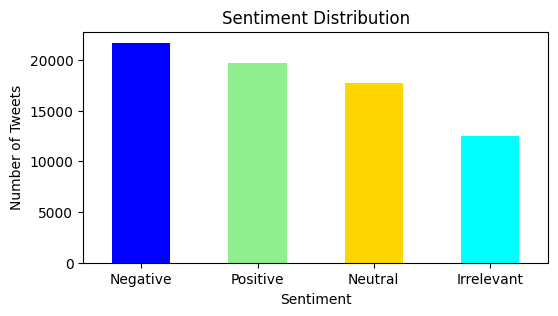

In [17]:
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['blue', 'lightgreen', 'gold', 'cyan'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [18]:
brand_data = df[df['Entity'].str.contains('Microsoft', case=False)]
brand_sentiment_counts = brand_data['Sentiment'].value_counts()
brand_sentiment_counts

,count
Sentiment,
Neutral,816
Negative,748
Positive,573
Irrelevant,167


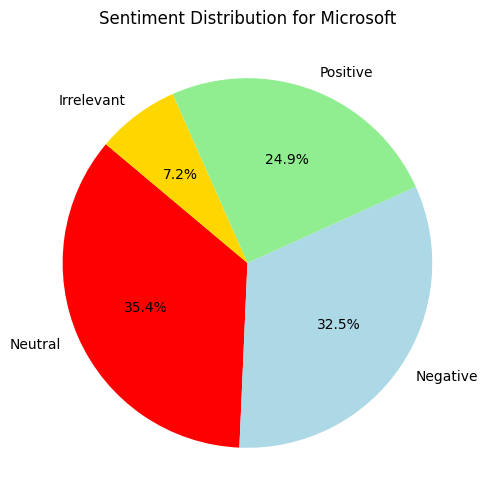

In [22]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140,colors=['red','lightblue','lightgreen','gold'])
plt.title('Sentiment Distribution for Microsoft')
plt.show()